## Tugas Akhir Microcredential Associate Data Scientist

### ITS-05 kelompok 3

#### Preface

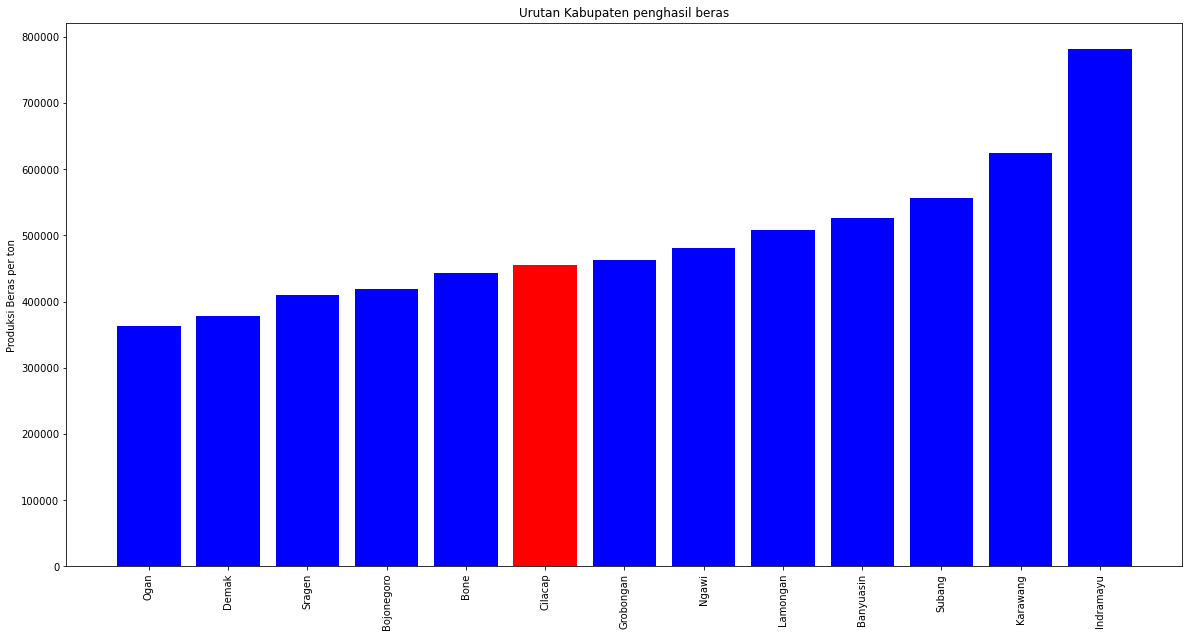

### Import Necessary Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as mno

In [2]:
# import 3 periode of season
# 2018-10 ~ 2019-03
# 2019-10 ~ 2020-03
# 2020-10 ~ 2021-03

ignore_data = ["8888"] # temporary, kalau ada ide buat ngolah nilai "8888", command ini bisa dihilangkan

df = pd.read_excel('dataset_iklim_cilacap_before_cleaning.xlsx', na_values = ignore_data)

In [3]:
# Quick data check

print(f"DataFrame shape : {df.shape}\n")
print(f"DataFrame columns: \n{df.columns}\n")
print(f"Columns type: {df.dtypes}")

df.head(3)

DataFrame shape : (547, 11)

DataFrame columns: 
Index(['Tanggal', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x',
       'ff_avg', 'ddd_car'],
      dtype='object')

Columns type: Tanggal     object
Tn         float64
Tx         float64
Tavg       float64
RH_avg     float64
RR         float64
ss         float64
ff_x       float64
ddd_x      float64
ff_avg     float64
ddd_car     object
dtype: object


,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-10-2018,23.0,30.4,27.2,83.0,NaN,3.2,5.0,140.0,2.0,E
1,02-10-2018,26.0,NaN,27.7,79.0,0.0,NaN,4.0,130.0,2.0,N
2,03-10-2018,25.0,30.4,27.2,80.0,NaN,8.9,7.0,150.0,3.0,E


In [4]:
# Quick data prep

# kita ingin mengolah dataset ini di domain timeseries
from datetime import datetime
df['datetime'] = [datetime.strptime(x,'%d-%m-%Y') for x in df['Tanggal']] # change string 'Tanngal' to timeseries format

# change datetime as index; 
df = df.set_index('datetime')
df.drop('Tanggal', axis=1, inplace=True)

# change 'ddd_car' to categorical
df['ddd_car'] = pd.Categorical(df.ddd_car)

# renaming columns
df.rename(columns={"RR": "curah_hujan", "Tavg": "temp_avg", "RH_avg": "humid_avg", 
                   "ss": "sun_expo", "ff_x": "wind_max", "ff_avg": "wind_avg", "Tn": "temp_min", 
                   "Tx": "temp_max", "ddd_car": "wind_dir", "ddd_x": "wind_dir_max"}, inplace=True)



# Menambahkan kolom 'Year', 'Month', 'Weekday' untuk mempermudah visualisasi dan statiscical need
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday

In [5]:
# Dividing 1 dataset to 3 periode (just for easier visualization & statistical description)
# 2018-10 ~ 2019-03
# 2019-10 ~ 2020-03
# 2020-10 ~ 2021-03

df_periode1 = df.loc['2018-10-01':'2019-03-01']
df_periode2 = df.loc['2019-10-01':'2020-03-01']
df_periode3 = df.loc['2020-10-01':'2021-03-01']

In [6]:
df_periode1.head(3)

,temp_min,temp_max,temp_avg,humid_avg,curah_hujan,sun_expo,wind_max,wind_dir_max,wind_avg,wind_dir,Year,Month,Weekday
datetime,,,,,,,,,,,,,
2018-10-01,23.0,30.4,27.2,83.0,NaN,3.2,5.0,140.0,2.0,E,2018,10,0
2018-10-02,26.0,NaN,27.7,79.0,0.0,NaN,4.0,130.0,2.0,N,2018,10,1
2018-10-03,25.0,30.4,27.2,80.0,NaN,8.9,7.0,150.0,3.0,E,2018,10,2


### Exploratory Data Analysis

In [7]:
#### Curah Hujan

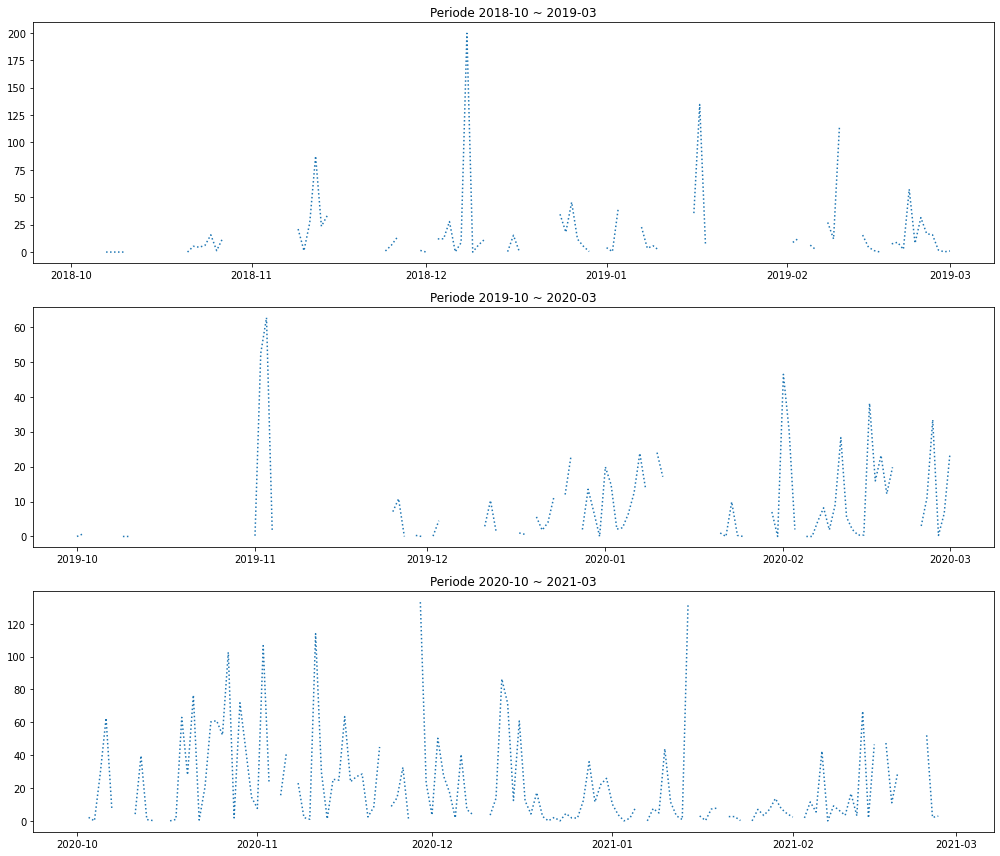

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14,12))

axes[0].plot(df_periode1['curah_hujan'], linestyle=':')
axes[0].set_title('Periode 2018-10 ~ 2019-03')

axes[1].plot(df_periode2['curah_hujan'], linestyle=':')
axes[1].set_title('Periode 2019-10 ~ 2020-03')

axes[2].plot(df_periode3['curah_hujan'], linestyle=':')
axes[2].set_title('Periode 2020-10 ~ 2021-03')

plt.tight_layout()

##### Curah hujan per periode

In [9]:
# Note : Urutan bulan boxplots dibawah dimulai dari yang terkecil ke terbesar. Keep that in mind when analyzing.
# Mau diubah ke 10-11-12-01-02-03 tapi masih belum bisa

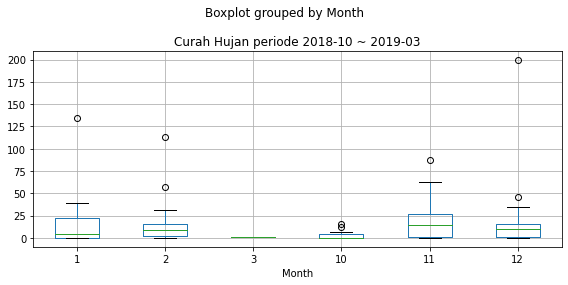

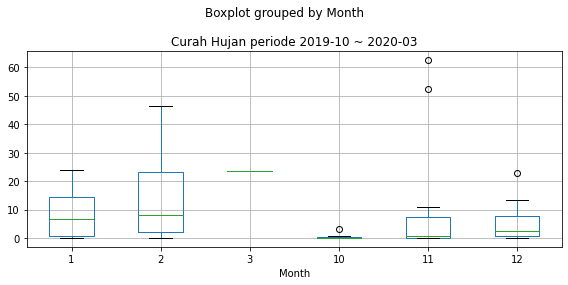

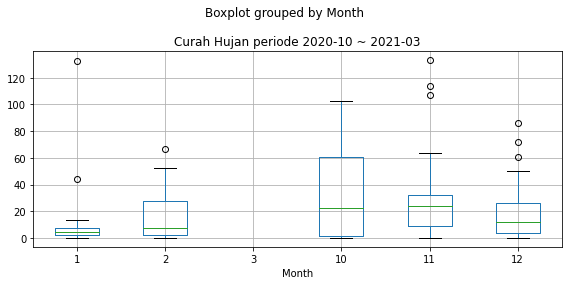

In [10]:
df_periode1.boxplot(column=['curah_hujan'], by='Month', figsize=(8, 4))
plt.title('Curah Hujan periode 2018-10 ~ 2019-03')
plt.tight_layout()

df_periode2.boxplot(column=['curah_hujan'], by='Month', figsize=(8, 4))
plt.title('Curah Hujan periode 2019-10 ~ 2020-03')
plt.tight_layout()

df_periode3.boxplot(column=['curah_hujan'], by='Month', figsize=(8, 4))
plt.title('Curah Hujan periode 2020-10 ~ 2021-03')
plt.tight_layout()


##### Temperature feature

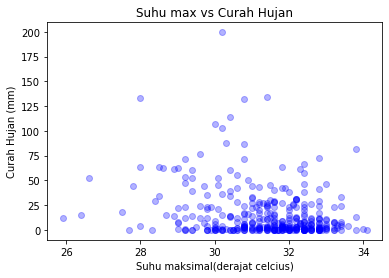

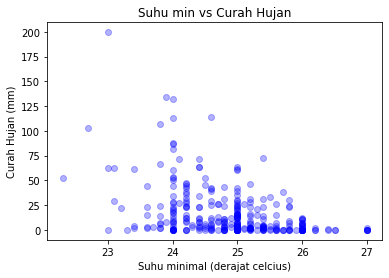

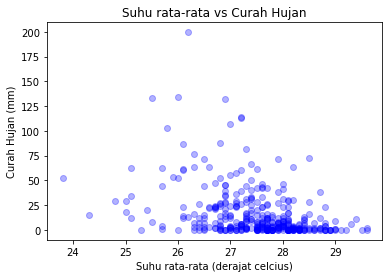

In [11]:
plt.scatter(df['temp_max'], df['curah_hujan'], color='blue', alpha=0.3)
plt.title('Suhu max vs Curah Hujan')
plt.xlabel('Suhu maksimal(derajat celcius)')
plt.ylabel('Curah Hujan (mm)')
plt.show()

plt.scatter(df['temp_min'], df.curah_hujan, color='blue', alpha=0.3)
plt.title('Suhu min vs Curah Hujan')
plt.xlabel('Suhu minimal (derajat celcius)')
plt.ylabel('Curah Hujan (mm)')
plt.show()

plt.scatter(df.temp_avg, df.curah_hujan, color='blue', alpha=0.3)
plt.title('Suhu rata-rata vs Curah Hujan')
plt.xlabel('Suhu rata-rata (derajat celcius)')
plt.ylabel('Curah Hujan (mm)')
plt.show()

##### Humidity feature

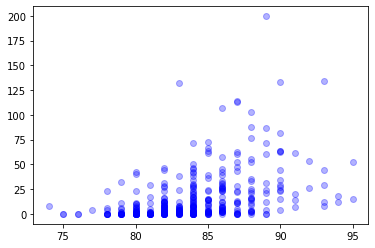

In [12]:
plt.scatter(df['humid_avg'], df['curah_hujan'], color='blue', alpha=0.3)

##### Sun exposure feature

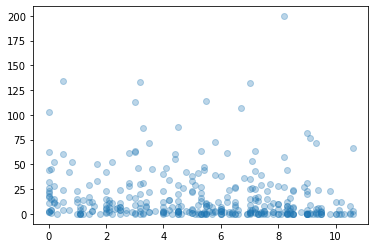

In [13]:
plt.scatter(df['sun_expo'], df['curah_hujan'], alpha=0.3)

##### Curah hujan perbulan

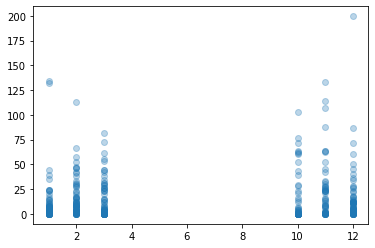

In [14]:
plt.scatter(df['Month'], df['curah_hujan'], alpha=0.3)

##### Wind feature

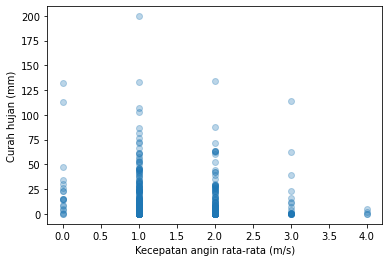

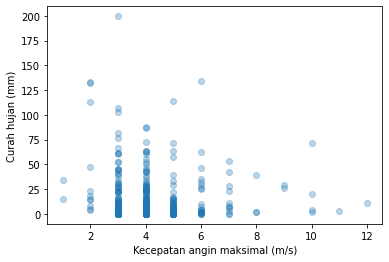

In [15]:
plt.scatter(df['wind_avg'], df['curah_hujan'], alpha=0.3)
plt.xlabel('Kecepatan angin rata-rata (m/s)')
plt.ylabel('Curah hujan (mm)')
plt.show()

plt.scatter(df['wind_max'], df['curah_hujan'], alpha=0.3)
plt.xlabel('Kecepatan angin maksimal (m/s)')
plt.ylabel('Curah hujan (mm)')
plt.show()

#### Wind Direction feature

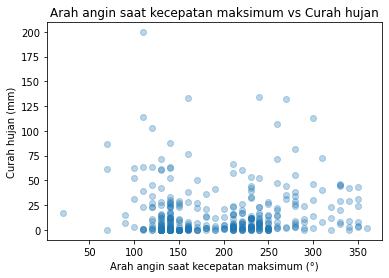

In [16]:
plt.scatter(df['wind_dir_max'], df['curah_hujan'], alpha=0.3)
plt.title('Arah angin saat kecepatan maksimum vs Curah hujan')
plt.xlabel('Arah angin saat kecepatan maksimum (°)')
plt.ylabel('Curah hujan (mm)')
plt.show()

### Data Preparation (data cleaning)

### Before Modeling

#### Train-Validation Split

In [17]:
# just a temporary dropna, soalnya belum di cleaning
print(f"Before dropna : {df.shape}")
df.dropna(axis=0, inplace=True)
print(f"After dropna : {df.shape}")

Before dropna : (547, 13)
After dropna : (312, 13)


In [18]:
# Here we use 7 features, temporary

X = df.loc[:, ['temp_min', 'temp_max', 'temp_avg', 'humid_avg', 'wind_max','wind_avg', 'wind_dir_max', 'sun_expo']]
y = df.loc[:, ['curah_hujan']]

#### Feature Scaling

Kenapa saya melakukan Feature scaling setelah train-test split?

"The fit method is calculating the mean and variance of each of the features present in our data. 
The transform method is transforming all the features using the respective mean and variance.

Now, we want scaling to be applied to our test data too and at the same time do not want to be biased with our model. 
We want our test data to be a completely new and a surprise set for our model. 
The transform method helps us in this case."

sumber : https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

### Modeling

#### Regresi Linear (without feature scaling)

Untuk melakukan regresi linear, kita perlu mengetahui independent variable mana yang paling berpengaruh ke dependent variabel (curah_hujan)

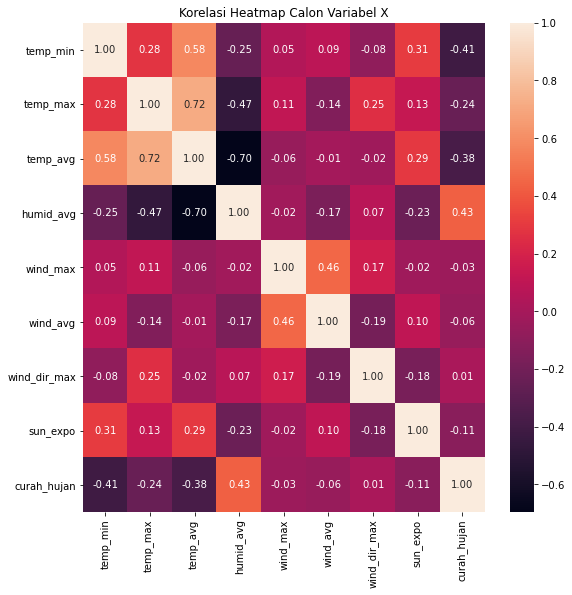

In [19]:
plt.figure(figsize=(9, 9))
sns.heatmap(pd.concat([X, y], axis=1).corr() ,annot=True ,fmt=".2f").set_title("Korelasi Heatmap Calon Variabel X")
plt.show()

Dari hasil visualisasi diatas, dapat diketahui humid_avg memiliki korelasi yang tinggi terhadap kolom curah_hujan / variabel dependent sehingga kita mengambil fitur/kolom humid_avg untuk di training

    Independent variabel(X) adalah humid_avg.
    Dependent variabel(y) adalah curah_hujan.



In [20]:
# Train-Validation Split
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X.iloc[:, 3].values.reshape(-1, 1), y.values.reshape(-1,1), train_size=0.7, random_state = 100)

In [21]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor.fit(X_train_reg, y_train_reg)

LinearRegression()

In [22]:
print(regressor.coef_)
print(regressor.intercept_)

[[2.32592757]]
[-181.13440611]


In [23]:
regressor.score(X_test_reg, y_test_reg)

0.1908343021006107

Model kita mendapatkan accuracy score sebesar 19.08%

Text(0.5, 1.0, 'Plot Kelembapan rata-rata vs Curah Hujan')

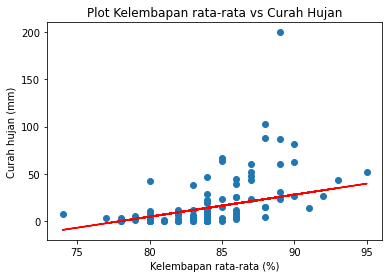

In [24]:
y_prediksi = regressor.predict(X_test_reg)

plt.scatter(X_test_reg, y_test_reg)
plt.plot(X_test_reg, y_prediksi, c='r')
plt.xlabel('Kelembapan rata-rata (%)')
plt.ylabel('Curah hujan (mm)')
plt.title('Plot Kelembapan rata-rata vs Curah Hujan')

###### Decision Tree (without feature scaling)

In [25]:
X = df.loc[:, ['humid_avg']].values
y = df.loc[:, ['curah_hujan']].values

In [26]:
# Train-Validation Split
# Using average humidity
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 100)

In [30]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

Text(0, 0.5, 'Curah hujan (mm)')

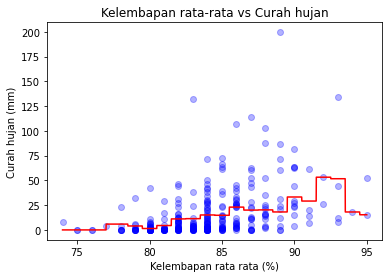

In [31]:
# Visualization
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='blue', alpha=0.3)
plt.plot(X_grid, regressor.predict(X_grid), color='red')
plt.title('Kelembapan rata-rata vs Curah hujan')
plt.xlabel('Kelembapan rata rata (%)')
plt.ylabel('Curah hujan (mm)')

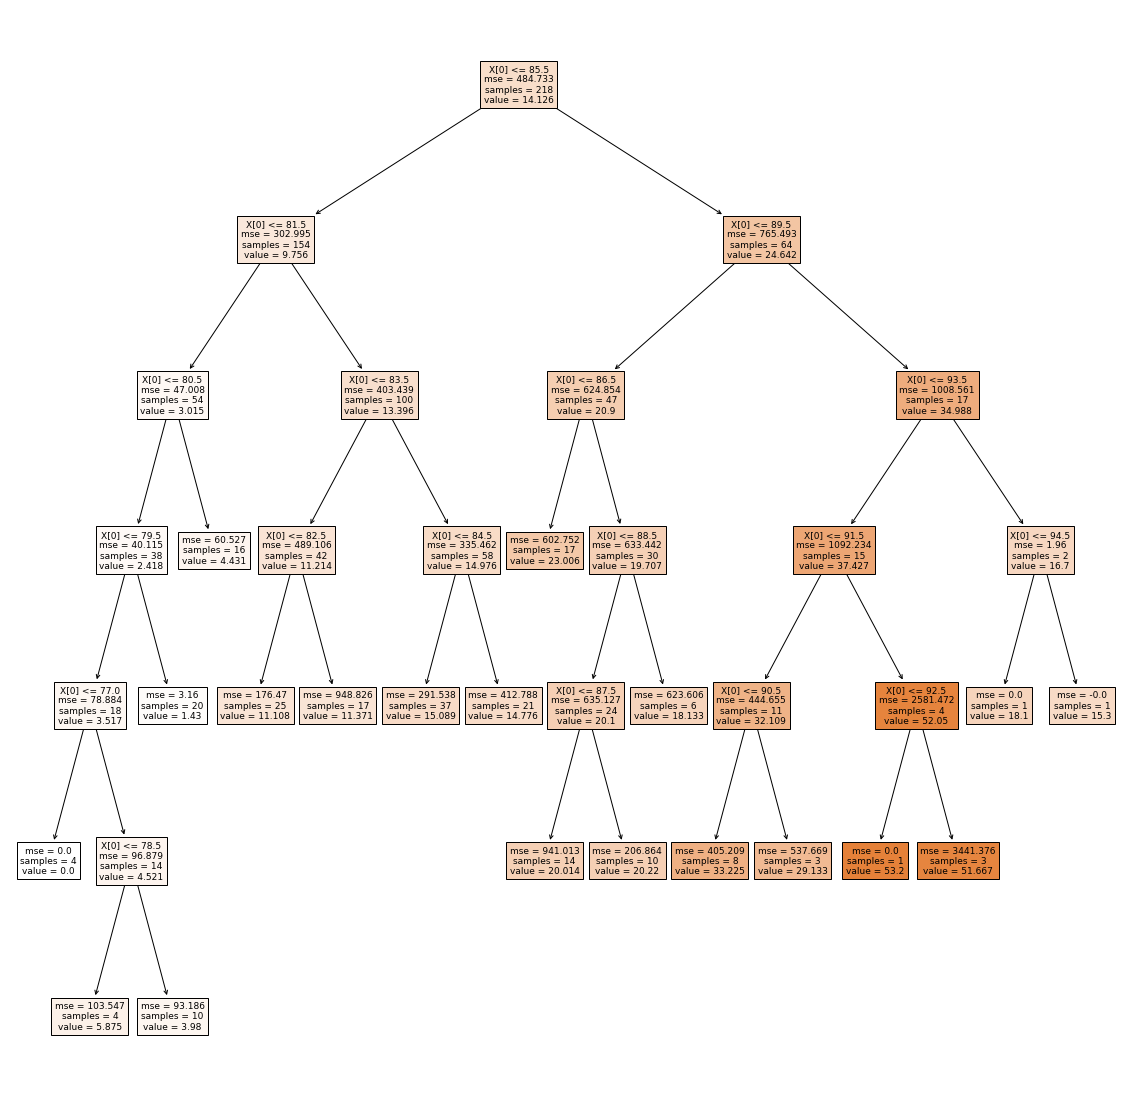

In [38]:
#from sklearn import tree

plt.figure(figsize=(20, 20))
tree.plot_tree(regressor, filled = True)
plt.show()